**Machine Learning Semester Project**

# **Group Introduction**

**MS DS Batch 2020
Group Mambers**

Khalil ul Rehman           **F2020313010**

Farhan Ahmad               **F2020313023**

Shahzada Farhan Mahmood     **F2020313004**

Muhammad Ali                **F2020313017**


# **Necessary Liberaries Imported here**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



**Models Liberuary and their Objects**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# **Importing data**

Using pandas liberuary in CSV form 

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/krkhalil/ML-Project/main/heart.csv')

# checking head of dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Info Function**


**memory usage**: 33.3 KB
**RangeIndex**: 303 **entries**, 0 to 302

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# ***Split the Data***

In [29]:
#X have all the variable other then target while y have just target variable 
X = df.drop('target', axis=1)
y = df.target

In [30]:
#set the training and the testing data into  variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# **Feature Scaling**

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **KNN Model Applying and getting its results**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
knn_score = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", knn_score)

Accuracy: 0.7213114754098361


In [35]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

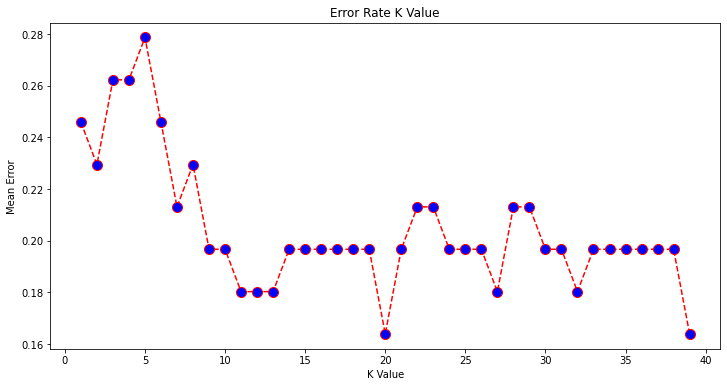

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# **Linear Regression**

In [37]:
mean_cp = sum(df['cp'])/len(df['cp'])
mean_target = sum(df['target'])/len(df['target'])

In [38]:
#variance formula define
def variance(values, mean):
  return sum([(val-mean)**2 for val in values])

In [39]:
#defining covariance between two variables
def covariance(cp, mean_cp, target, mean_target):
  covariance = 0
  for r in range(len(cp)):
    covariance = covariance + (cp[r] - mean_cp) * (target[r]-mean_target)
    return covariance

In [40]:
#calculating variance
variance_cp = variance(df['cp'],mean_cp)
variance_target = variance(df['target'],mean_target)
variance_cp,variance_target

(321.66996699669994, 75.14851485148552)

In [41]:
#calculating covariance
cov = covariance(df['cp'],mean_cp,df['target'],mean_target)
cov

0.9259222951998168

In [42]:
#formula 
#mx+c
m = cov/variance_cp
c = mean_target-m*mean_cp
m,c

(0.0028784853738282505, 0.5417709695890044)

In [43]:
heart_disease_chance = m + c
Lin_Reg_score=heart_disease_chance

# **Decission Tree Model**

In [44]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [45]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [46]:
# Model Accuracy
dts = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", dts)

Accuracy: 0.7704918032786885


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


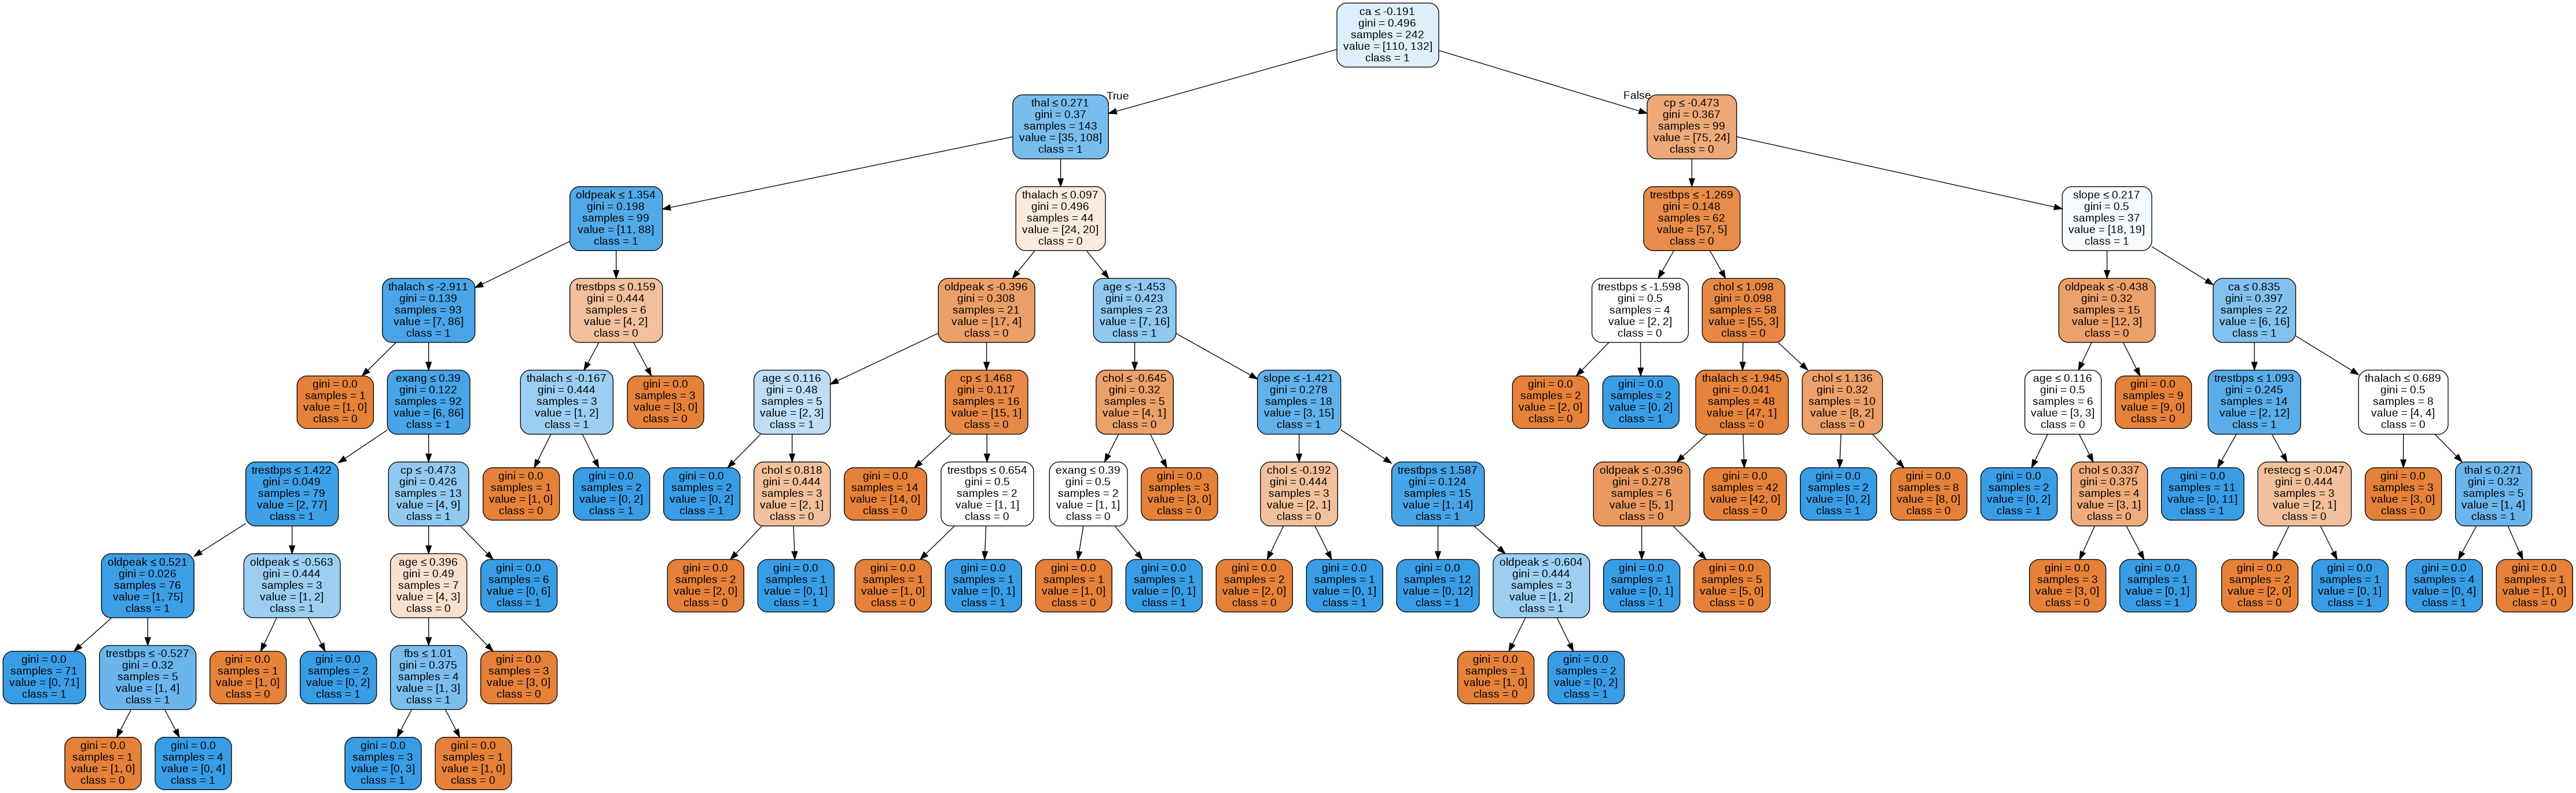

In [47]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

**Optimizing Decision Tree**

In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8524590163934426


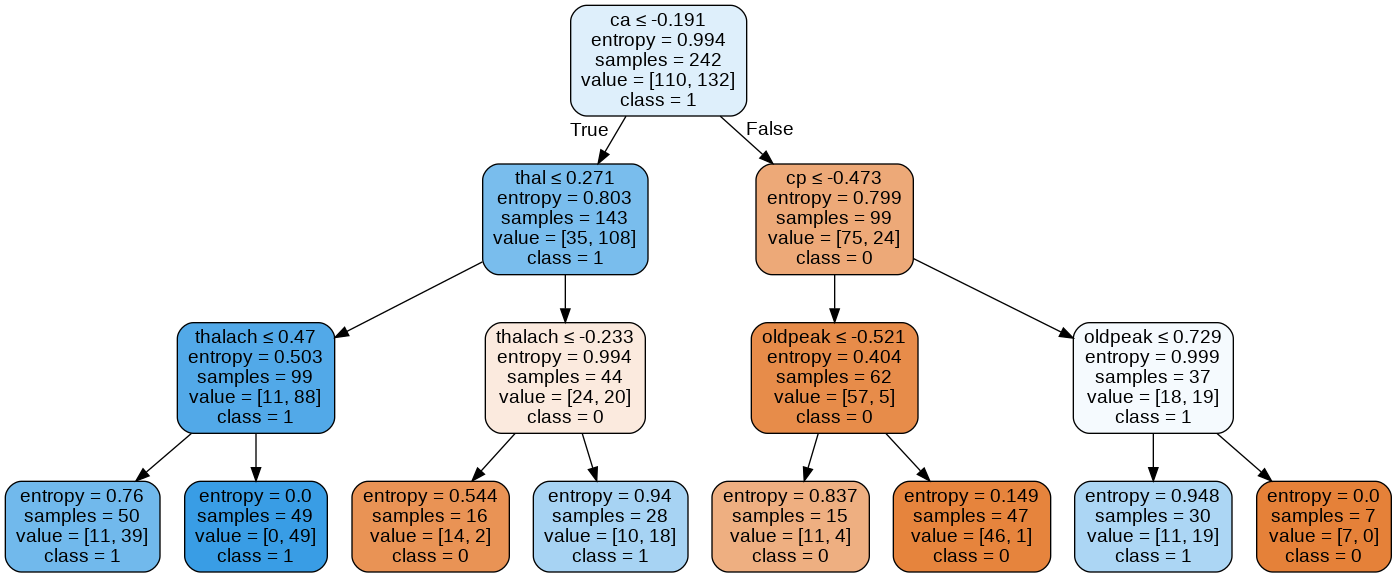

In [49]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# **Support Vector Machine Model**

In [50]:
#changing the kernal one by one here 
# Gausian Kernal = rbf
# Sigmoid Kernal = sigmoid
#Polynomial Kernel = poly
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
y_pred = svclassifier.predict(X_test)

# Model Accuracy
SVM_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", SVM_score)

Accuracy: 0.8032786885245902


# **Logistic Regression**

In [52]:
class LogisticRegression:
    
    # defining parameters such as learning rate, number ot iterations, whether to include intercept, 
    # and verbose which says whether to print anything or not like, loss etc.
    def __init__(self, learning_rate, num_iterations, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # function to define the Incercept value.
    def __b_intercept(self, X):
        # initially we set it as all 1's
        intercept = np.ones((X.shape[0], 1))
        # then we concatinate them to the value of X, we don't add we just append them at the end.
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid_function(self, z):
        # this is our actual sigmoid function which predicts our yp
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, yp, y):
        # this is the loss function which we use to minimize the error of our model
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    # this is the function which trains our model.
    def fit(self, X, y):
        
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # weights initialization of our Normal Vector, initially we set it to 0, then we learn it eventually
        self.W = np.zeros(X.shape[1])
        
        # this for loop runs for the number of iterations provided
        for i in range(self.num_iterations):
            
            # this is our W * Xi
            z = np.dot(X, self.W)
            
            # this is where we predict the values of Y based on W and Xi
            yp = self.__sigmoid_function(z)
            
            # this is where the gradient is calculated form the error generated by our model
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            # this is where we update our values of W, so that we can use the new values for the next iteration
            self.W -= self.learning_rate * gradient
            
            # this is our new W * Xi
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            
            # this is where the loss is calculated
            loss = self.__loss(yp, y)
            
            # as mentioned above if we want to print somehting we use verbose, so if verbose=True then our loss get printed
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # this is where we predict the probability values based on out generated W values out of all those iterations.
    def predict_prob(self, X):
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # this is the final prediction that is generated based on the values learned.
        return self.__sigmoid_function(np.dot(X, self.W))
    
    # this is where we predict the actual values 0 or 1 using round. anything less than 0.5 = 0 or more than 0.5 is 1
    def predict(self, X):
        return self.predict_prob(X).round()


In [53]:
model = LogisticRegression(learning_rate=0.1, num_iterations=300)

In [54]:
model.fit(X_train, y_train)

In [55]:
preds = model.predict(X_test)

In [56]:

LogScore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", LogScore)

Accuracy: 0.8032786885245902


# **Principal Component Analysis (PCA)**

In [57]:

from sklearn.linear_model import LogisticRegression

In [58]:
num_features = len(df.columns) - 1
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [59]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigen vals: {}'.format(eigen_vals))

Eigen vals: [2.8169554  1.70064235 1.24448824 1.23859049 1.08824019 0.92696097
 0.34647782 0.80464168 0.43941714 0.63988588 0.53533218 0.56203971
 0.71793932]


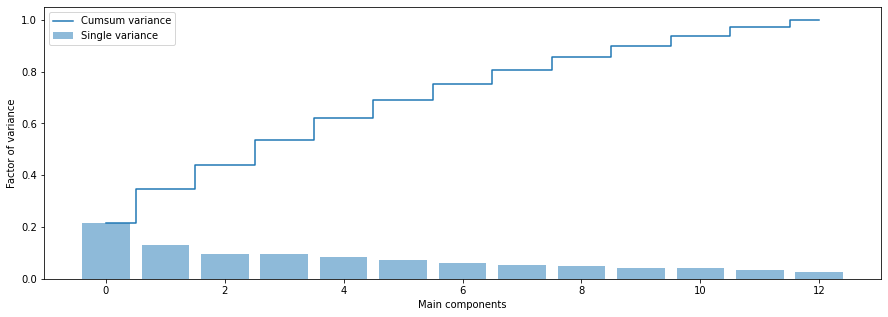

In [60]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(15,5))
plt.bar(range(num_features), var_exp, alpha=.5, align='center', label='Single variance')
plt.step(range(num_features), cum_var_exp, where='mid', label='Cumsum variance')
plt.ylabel('Factor of variance')
plt.xlabel('Main components')
plt.legend(loc='best')
plt.show()

In [61]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k: k[0], reverse=True)
W = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n{}'.format(W))

Matrix W: 
[[ 0.2970939   0.37598744]
 [ 0.12753815 -0.31428224]
 [-0.28248614  0.28206615]
 [ 0.15671961  0.41601634]
 [ 0.07741081  0.38573334]
 [ 0.06853141  0.3466345 ]
 [-0.15139509 -0.31485373]
 [-0.39607094  0.06255742]
 [ 0.36867201 -0.26340957]
 [ 0.43686267 -0.0724688 ]
 [-0.35116664  0.12055446]
 [ 0.30630668  0.19388372]
 [ 0.23815605 -0.09206856]]


In [62]:
X_train_pca = X_train_std.dot(W)
X_test_pca = X_test_std.dot(W)

In [63]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pca_score= model.score(X_test, y_test)
    return pca_score,y_pred


In [64]:
lr = LogisticRegression()
run_model(lr, X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)

(0.8021978021978022,
 array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 0]))

# **Neural Network Model**

In [65]:
y_label = df['target'].values.reshape(X.shape[0], 1)

#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)

#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (242, 13)
Shape of test set is (61, 13)
Shape of train label is (242, 1)
Shape of test labels is (61, 1)


In [66]:
#intilizing the class of NN because its a binary classification therforr a single class
class NeuralNet():  
  #define a methode and creating a Constructor of a class and pass it necessary parameters
    def __init__(self, layers, learning_rate, iterations):
      #creating a dictionary and a list and necessary variable for the NN
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None         
    
    def init_weights(self):
        np.random.seed(1)
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
    
    def relu(self,Z):
        return np.maximum(0,Z)
    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)
    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss
    def forward_propagation(self):
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)
        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1
        return yhat,loss
    def back_propagation(self,yhat):
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat
        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig
        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)
        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.init_weights()
        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)
    def predict(self, X):
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 
    def acc(self, y, yhat):
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()




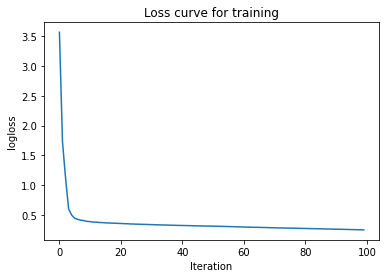

In [67]:
nn = NeuralNet(layers=[13,8,1], learning_rate=0.01, iterations=100) # create the model object 
nn.fit(Xtrain, ytrain) #train the model using sklear fit methode
nn.plot_loss()

In [68]:
train_prediction = nn.predict(Xtrain)
test_prediction = nn.predict(Xtest)
Train_accurecy = nn.acc(ytrain, train_prediction)
Test_accurecy = nn.acc(ytest, test_prediction)
print("Train accuracy is {}".format(Train_accurecy))
print("Test accuracy is {}".format(Test_accurecy))

Train accuracy is 89
Test accuracy is 88


# **Conclusion Reading**

In [69]:
Results  = {'Models':['Linear Regression','KNN','Decision Tree','SVM', 'Logistic Regression', 'PCA', 'Neural Network'],'Accuracy Score':[Lin_Reg_score*100,knn_score*100,dts*100,SVM_score*100,LogScore*100,0.83*100,Test_accurecy]}
Results

{'Accuracy Score': [54.46494549628327,
  72.1311475409836,
  77.04918032786885,
  80.32786885245902,
  80.32786885245902,
  83.0,
  88],
 'Models': ['Linear Regression',
  'KNN',
  'Decision Tree',
  'SVM',
  'Logistic Regression',
  'PCA',
  'Neural Network']}

In [70]:
res = pd.DataFrame(Results)
res

,Models,Accuracy Score
0,Linear Regression,54.464945
1,KNN,72.131148
2,Decision Tree,77.049180
3,SVM,80.327869
4,Logistic Regression,80.327869
5,PCA,83.000000
6,Neural Network,88.000000
